In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.calibration import LabelEncoder
import re
from sklearn import metrics
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import pickle 
import json

#Data Import and Loading 

In [2]:
df1=pd.read_csv('Resale Flat Prices (Based on Approval Date), 1990 - 1999.csv')
df2=pd.read_csv('Resale Flat Prices (Based on Approval Date), 2000 - Feb 2012.csv')
df3=pd.read_csv('Resale Flat Prices (Based on Registration Date), From Jan 2015 to Dec 2016.csv')
df4=pd.read_csv('Resale Flat Prices (Based on Registration Date), From Mar 2012 to Dec 2014.csv')
df5=pd.read_csv('Resale flat prices based on registration date from Jan-2017 onwards.csv')

In [3]:
df=pd.concat([df1,df2,df3,df4,df5], axis=0)
df

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease
0,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000.0,NaN
1,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000.0,NaN
2,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000.0,NaN
3,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000.0,NaN
4,1990-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,47200.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
191138,2024-10,YISHUN,4 ROOM,303,YISHUN CTRL,10 TO 12,105.0,Model A,1988,582000.0,63 years 02 months
191139,2024-10,YISHUN,4 ROOM,450,YISHUN RING RD,07 TO 09,92.0,Model A,2012,593500.0,86 years 11 months
191140,2024-10,YISHUN,4 ROOM,112,YISHUN RING RD,10 TO 12,89.0,Simplified,1985,490000.0,60 years 02 months
191141,2024-10,YISHUN,4 ROOM,468A,YISHUN ST 43,10 TO 12,93.0,Model A,2019,620000.0,94 years 03 months


In [4]:
df.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease
0,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000.0,NaN
1,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000.0,NaN
2,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000.0,NaN
3,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000.0,NaN
4,1990-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,47200.0,NaN


In [5]:
df.shape

(937346, 11)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 937346 entries, 0 to 191142
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                937346 non-null  object 
 1   town                 937346 non-null  object 
 2   flat_type            937346 non-null  object 
 3   block                937346 non-null  object 
 4   street_name          937346 non-null  object 
 5   storey_range         937346 non-null  object 
 6   floor_area_sqm       937346 non-null  float64
 7   flat_model           937346 non-null  object 
 8   lease_commence_date  937346 non-null  int64  
 9   resale_price         937346 non-null  float64
 10  remaining_lease      228296 non-null  object 
dtypes: float64(2), int64(1), object(8)
memory usage: 85.8+ MB


In [7]:
df.isnull().sum()

month                       0
town                        0
flat_type                   0
block                       0
street_name                 0
storey_range                0
floor_area_sqm              0
flat_model                  0
lease_commence_date         0
resale_price                0
remaining_lease        709050
dtype: int64

In [8]:
df['remaining_lease']= df['remaining_lease'].fillna('0')

df.isnull().sum()

month                  0
town                   0
flat_type              0
block                  0
street_name            0
storey_range           0
floor_area_sqm         0
flat_model             0
lease_commence_date    0
resale_price           0
remaining_lease        0
dtype: int64

In [9]:
df.columns

Index(['month', 'town', 'flat_type', 'block', 'street_name', 'storey_range',
       'floor_area_sqm', 'flat_model', 'lease_commence_date', 'resale_price',
       'remaining_lease'],
      dtype='object')

In [10]:
df['flat_type'].unique()

array(['1 ROOM', '3 ROOM', '4 ROOM', '5 ROOM', '2 ROOM', 'EXECUTIVE',
       'MULTI GENERATION', 'MULTI-GENERATION'], dtype=object)

In [11]:
#Replacing MULTI-GENERATION with MULTI GENERATION

df.loc[df['flat_type'] == 'MULTI-GENERATION', 'flat_type']='MULTI GENERATION'

In [12]:
df['flat_type'].unique()

array(['1 ROOM', '3 ROOM', '4 ROOM', '5 ROOM', '2 ROOM', 'EXECUTIVE',
       'MULTI GENERATION'], dtype=object)

In [13]:
df['block'].unique()

array(['309', '216', '211', ..., '458B', '458A', '458C'], dtype=object)

In [14]:
# Converting the block column to int
df.loc[:, 'block'] = df['block'].astype(str)
df.loc[:, 'block'] = df['block'].apply(lambda x: ''.join(char for char in x if char in '0123456789'))

In [15]:
df['street_name'].unique()

array(['ANG MO KIO AVE 1', 'ANG MO KIO AVE 3', 'ANG MO KIO AVE 4',
       'ANG MO KIO AVE 10', 'ANG MO KIO AVE 5', 'ANG MO KIO AVE 8',
       'ANG MO KIO AVE 6', 'ANG MO KIO AVE 9', 'ANG MO KIO AVE 2',
       'BEDOK RESERVOIR RD', 'BEDOK NTH ST 3', 'BEDOK STH RD',
       'NEW UPP CHANGI RD', 'BEDOK NTH RD', 'BEDOK STH AVE 1',
       'CHAI CHEE RD', 'CHAI CHEE DR', 'BEDOK NTH AVE 4',
       'BEDOK STH AVE 3', 'BEDOK STH AVE 2', 'BEDOK NTH ST 2',
       'BEDOK NTH ST 4', 'BEDOK NTH AVE 2', 'BEDOK NTH AVE 3',
       'BEDOK NTH AVE 1', 'BEDOK NTH ST 1', 'CHAI CHEE ST', 'SIN MING RD',
       'SHUNFU RD', 'BT BATOK ST 11', 'BT BATOK WEST AVE 8',
       'BT BATOK WEST AVE 6', 'BT BATOK ST 21', 'BT BATOK EAST AVE 5',
       'BT BATOK EAST AVE 4', 'HILLVIEW AVE', 'BT BATOK CTRL',
       'BT BATOK ST 31', 'BT BATOK EAST AVE 3', 'TAMAN HO SWEE',
       'TELOK BLANGAH CRES', 'BEO CRES', 'TELOK BLANGAH DR', 'DEPOT RD',
       'TELOK BLANGAH RISE', 'JLN BT MERAH', 'HENDERSON RD', 'INDUS RD',
       

In [16]:
df['storey_range'].unique()

array(['10 TO 12', '04 TO 06', '07 TO 09', '01 TO 03', '13 TO 15',
       '19 TO 21', '16 TO 18', '25 TO 27', '22 TO 24', '28 TO 30',
       '31 TO 33', '40 TO 42', '37 TO 39', '34 TO 36', '46 TO 48',
       '43 TO 45', '49 TO 51', '06 TO 10', '01 TO 05', '11 TO 15',
       '16 TO 20', '21 TO 25', '26 TO 30', '36 TO 40', '31 TO 35'],
      dtype=object)

In [17]:
df['floor_area_sqm'].unique()

array([ 31. ,  73. ,  67. ,  82. ,  74. ,  88. ,  89. ,  83. ,  68. ,
        75. ,  81. ,  91. ,  92. ,  97. ,  90. ,  98. ,  99. , 100. ,
        93. , 103. , 119. , 120. , 118. , 121. , 135. , 117. ,  45. ,
        65. ,  59. ,  70. ,  76. ,  84. , 104. , 105. , 125. , 132. ,
       139. , 123. , 143. , 151. ,  69. , 106. , 107. , 116. , 149. ,
       141. , 146. , 148. , 145. , 154. , 150. ,  29. ,  51. ,  61. ,
        63. ,  64. ,  72. ,  58. ,  66. ,  60. ,  53. ,  54. ,  56. ,
        77. , 133. , 131. , 115. ,  43. ,  38. ,  41. ,  85. , 111. ,
       101. , 112. , 137. , 127. , 147. , 163. ,  50. ,  40. ,  60.3,
        62. ,  55. ,  57. ,  52. ,  63.1, 102. ,  83.1, 126. , 140. ,
       142. ,  71. , 108. , 144. ,  96. , 114. , 157. , 152. , 155. ,
        87. , 109. , 110. ,  94. , 134. , 122. , 128. ,  78. ,  46. ,
        42. ,  49. ,  47. ,  86. , 156. ,  79. ,  80. , 124. ,  28. ,
       113. ,  95. , 160. , 136. ,  48. , 138. , 161. ,  39. , 130. ,
       159. , 206. ,

In [18]:
df['flat_model'].unique()

array(['IMPROVED', 'NEW GENERATION', 'MODEL A', 'STANDARD', 'SIMPLIFIED',
       'MODEL A-MAISONETTE', 'APARTMENT', 'MAISONETTE', 'TERRACE',
       '2-ROOM', 'IMPROVED-MAISONETTE', 'MULTI GENERATION',
       'PREMIUM APARTMENT', 'Improved', 'New Generation', 'Model A',
       'Standard', 'Apartment', 'Simplified', 'Model A-Maisonette',
       'Maisonette', 'Multi Generation', 'Adjoined flat',
       'Premium Apartment', 'Terrace', 'Improved-Maisonette',
       'Premium Maisonette', '2-room', 'Model A2', 'Type S1', 'Type S2',
       'DBSS', 'Premium Apartment Loft', '3Gen'], dtype=object)

In [19]:
df.loc[df['flat_model'] == 'Improved', 'flat_model']='IMPROVED'
df.loc[df['flat_model'] == 'New Generation', 'flat_model']='NEW GENERATION'
df.loc[df['flat_model'] == 'Model A', 'flat_model']='MODEL A'
df.loc[df['flat_model'] == 'Standard', 'flat_model']='STANDARD'
df.loc[df['flat_model'] == 'Apartment', 'flat_model']='APARTMENT'
df.loc[df['flat_model'] == 'Simplified', 'flat_model']='SIMPLIFIED'
df.loc[df['flat_model'] == 'Model A-Maisonette', 'flat_model']='MODEL A-MAISONETTE'
df.loc[df['flat_model'] == 'Maisonette', 'flat_model']='MAISONETTE'
df.loc[df['flat_model'] == 'Multi Generation', 'flat_model']='MULTI GENERATION'
df.loc[df['flat_model'] == 'Premium Apartment', 'flat_model']='PREMIUM APARTMENT'
df.loc[df['flat_model'] == 'Terrace', 'flat_model']='TERRACE'
df.loc[df['flat_model'] == 'Improved-Maisonette', 'flat_model']='IMPROVED-MAISONETTE'

In [20]:
df['flat_model'].unique()

array(['IMPROVED', 'NEW GENERATION', 'MODEL A', 'STANDARD', 'SIMPLIFIED',
       'MODEL A-MAISONETTE', 'APARTMENT', 'MAISONETTE', 'TERRACE',
       '2-ROOM', 'IMPROVED-MAISONETTE', 'MULTI GENERATION',
       'PREMIUM APARTMENT', 'Adjoined flat', 'Premium Maisonette',
       '2-room', 'Model A2', 'Type S1', 'Type S2', 'DBSS',
       'Premium Apartment Loft', '3Gen'], dtype=object)

In [21]:
df['lease_commence_date'].unique()

array([1977, 1976, 1978, 1979, 1984, 1980, 1985, 1981, 1982, 1986, 1972,
       1983, 1973, 1969, 1975, 1971, 1974, 1967, 1970, 1968, 1988, 1987,
       1989, 1990, 1992, 1993, 1994, 1991, 1995, 1996, 1997, 1998, 1999,
       2000, 2001, 1966, 2002, 2006, 2003, 2005, 2004, 2008, 2007, 2009,
       2010, 2012, 2011, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020],
      dtype=int64)

In [22]:
df['resale_price'].unique()

array([  9000.,   6000.,   8000., ..., 611700., 655666., 950500.])

In [23]:
df['remaining_lease'].unique()

array(['0', 70, 65, 64, 63, 62, 69, 60, 61, 86, 77, 80, 90, 87, 66, 58,
       94, 71, 68, 84, 73, 79, 76, 72, 82, 74, 67, 88, 81, 89, 53, 54, 55,
       57, 93, 83, 85, 92, 91, 59, 95, 52, 51, 56, 75, 96, 78, 50, 97, 49,
       48, '61 years 04 months', '60 years 07 months',
       '62 years 05 months', '62 years 01 month', '63 years',
       '61 years 06 months', '58 years 04 months', '59 years 08 months',
       '59 years 06 months', '60 years', '62 years 08 months', '61 years',
       '60 years 10 months', '59 years 03 months', '61 years 05 months',
       '60 years 04 months', '62 years', '60 years 03 months',
       '63 years 09 months', '61 years 01 month', '61 years 10 months',
       '58 years 06 months', '59 years 04 months', '62 years 11 months',
       '60 years 08 months', '93 years 08 months', '93 years 07 months',
       '60 years 01 month', '94 years 08 months', '78 years 04 months',
       '60 years 06 months', '62 years 06 months', '58 years',
       '70 years 08 mont

In [24]:
df['month'].unique()

array(['1990-01', '1990-02', '1990-03', '1990-04', '1990-05', '1990-06',
       '1990-07', '1990-08', '1990-09', '1990-10', '1990-11', '1990-12',
       '1991-01', '1991-02', '1991-03', '1991-04', '1991-05', '1991-06',
       '1991-07', '1991-08', '1991-09', '1991-10', '1991-11', '1991-12',
       '1992-01', '1992-02', '1992-03', '1992-04', '1992-05', '1992-06',
       '1992-07', '1992-08', '1992-09', '1992-10', '1992-11', '1992-12',
       '1993-01', '1993-02', '1993-03', '1993-04', '1993-05', '1993-06',
       '1993-07', '1993-08', '1993-09', '1993-10', '1993-11', '1993-12',
       '1994-01', '1994-02', '1994-03', '1994-04', '1994-05', '1994-06',
       '1994-07', '1994-08', '1994-09', '1994-10', '1994-11', '1994-12',
       '1995-01', '1995-02', '1995-03', '1995-04', '1995-05', '1995-06',
       '1995-07', '1995-08', '1995-09', '1995-10', '1995-11', '1995-12',
       '1996-01', '1996-02', '1996-03', '1996-04', '1996-05', '1996-06',
       '1996-07', '1996-08', '1996-09', '1996-10', 

In [25]:
#splitting month column to year and month
df.loc[:, 'reg_year'] = df['month'].apply(lambda x: int(x.split('-')[0]))
df.loc[:, 'reg_month'] = df['month'].apply(lambda x: int(x.split('-')[1]))

In [26]:
df['month'].unique()

array(['1990-01', '1990-02', '1990-03', '1990-04', '1990-05', '1990-06',
       '1990-07', '1990-08', '1990-09', '1990-10', '1990-11', '1990-12',
       '1991-01', '1991-02', '1991-03', '1991-04', '1991-05', '1991-06',
       '1991-07', '1991-08', '1991-09', '1991-10', '1991-11', '1991-12',
       '1992-01', '1992-02', '1992-03', '1992-04', '1992-05', '1992-06',
       '1992-07', '1992-08', '1992-09', '1992-10', '1992-11', '1992-12',
       '1993-01', '1993-02', '1993-03', '1993-04', '1993-05', '1993-06',
       '1993-07', '1993-08', '1993-09', '1993-10', '1993-11', '1993-12',
       '1994-01', '1994-02', '1994-03', '1994-04', '1994-05', '1994-06',
       '1994-07', '1994-08', '1994-09', '1994-10', '1994-11', '1994-12',
       '1995-01', '1995-02', '1995-03', '1995-04', '1995-05', '1995-06',
       '1995-07', '1995-08', '1995-09', '1995-10', '1995-11', '1995-12',
       '1996-01', '1996-02', '1996-03', '1996-04', '1996-05', '1996-06',
       '1996-07', '1996-08', '1996-09', '1996-10', 

In [27]:
df['town'].unique()

array(['ANG MO KIO', 'BEDOK', 'BISHAN', 'BUKIT BATOK', 'BUKIT MERAH',
       'BUKIT TIMAH', 'CENTRAL AREA', 'CHOA CHU KANG', 'CLEMENTI',
       'GEYLANG', 'HOUGANG', 'JURONG EAST', 'JURONG WEST',
       'KALLANG/WHAMPOA', 'MARINE PARADE', 'QUEENSTOWN', 'SENGKANG',
       'SERANGOON', 'TAMPINES', 'TOA PAYOH', 'WOODLANDS', 'YISHUN',
       'LIM CHU KANG', 'SEMBAWANG', 'BUKIT PANJANG', 'PASIR RIS',
       'PUNGGOL'], dtype=object)

In [28]:
temp = pd.DataFrame(df.groupby('flat_type')['flat_model'].unique()).reset_index()
print(temp)

          flat_type                                         flat_model
0            1 ROOM                                         [IMPROVED]
1            2 ROOM  [IMPROVED, STANDARD, 2-ROOM, 2-room, MODEL A, ...
2            3 ROOM  [NEW GENERATION, IMPROVED, MODEL A, STANDARD, ...
3            4 ROOM  [NEW GENERATION, IMPROVED, MODEL A, SIMPLIFIED...
4            5 ROOM  [IMPROVED, MODEL A, STANDARD, MODEL A-MAISONET...
5         EXECUTIVE  [APARTMENT, MAISONETTE, PREMIUM APARTMENT, Adj...
6  MULTI GENERATION                                 [MULTI GENERATION]


In [29]:
temp = pd.DataFrame(df.groupby('flat_type')['flat_model'].nunique()).reset_index()
print(temp)

          flat_type  flat_model
0            1 ROOM           1
1            2 ROOM           7
2            3 ROOM           9
3            4 ROOM          12
4            5 ROOM          11
5         EXECUTIVE           5
6  MULTI GENERATION           1


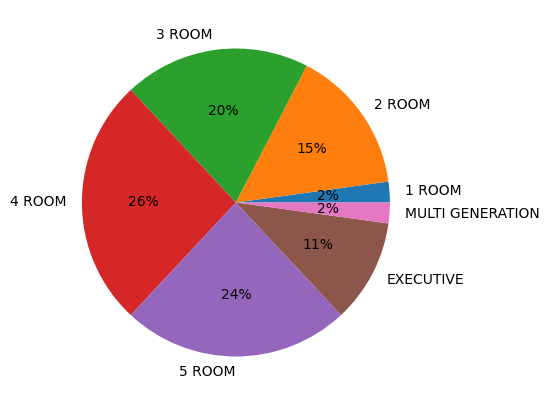

In [30]:
plt.figure(figsize = (10,5))
plt.pie(temp['flat_model'], labels = temp['flat_type'], autopct = '%.0f%%')
plt.show()

In [31]:
temp2 = df.groupby('town')['resale_price'].mean().reset_index()
print(temp2)

               town   resale_price
0        ANG MO KIO  260601.256176
1             BEDOK  278236.424660
2            BISHAN  425539.791437
3       BUKIT BATOK  284695.944508
4       BUKIT MERAH  359058.799824
5     BUKIT PANJANG  336924.393478
6       BUKIT TIMAH  458961.801684
7      CENTRAL AREA  347707.188308
8     CHOA CHU KANG  350741.896387
9          CLEMENTI  288103.484433
10          GEYLANG  278495.997106
11          HOUGANG  323335.246079
12      JURONG EAST  285156.681204
13      JURONG WEST  297043.271293
14  KALLANG/WHAMPOA  331683.864651
15     LIM CHU KANG   63660.937500
16    MARINE PARADE  341630.118512
17        PASIR RIS  408319.754897
18          PUNGGOL  491192.169160
19       QUEENSTOWN  304531.101998
20        SEMBAWANG  390318.745602
21         SENGKANG  443858.936885
22        SERANGOON  331441.515891
23         TAMPINES  338955.368376
24        TOA PAYOH  309747.566122
25        WOODLANDS  316668.519564
26           YISHUN  274090.380285


Floor area distribution of Flat type

<Axes: title={'center': 'Floor Area distribution of Flat type'}, xlabel='flat_type', ylabel='floor_area_sqm'>

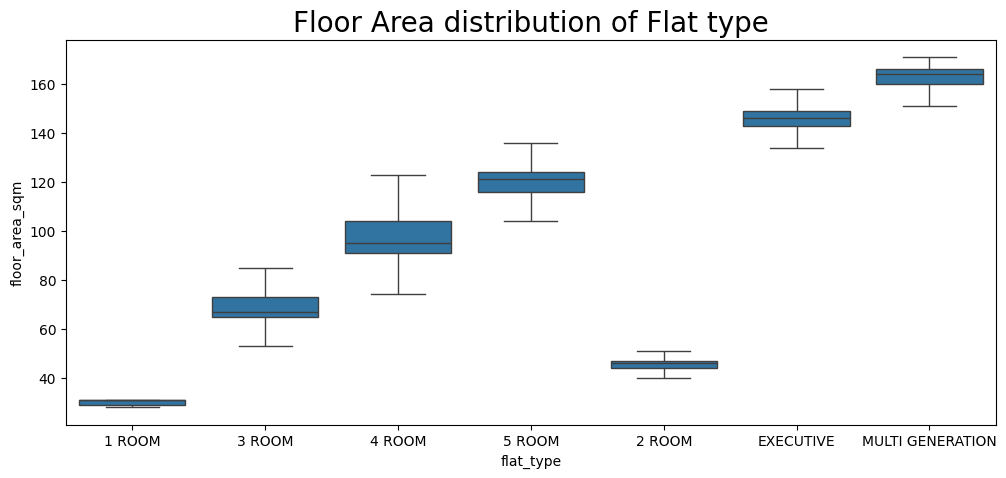

In [32]:
plt.figure(figsize = (12,5))
plt.title('Floor Area distribution of Flat type', size=20)
sns.boxplot(x = 'flat_type', y ='floor_area_sqm', data = df, showfliers = False)

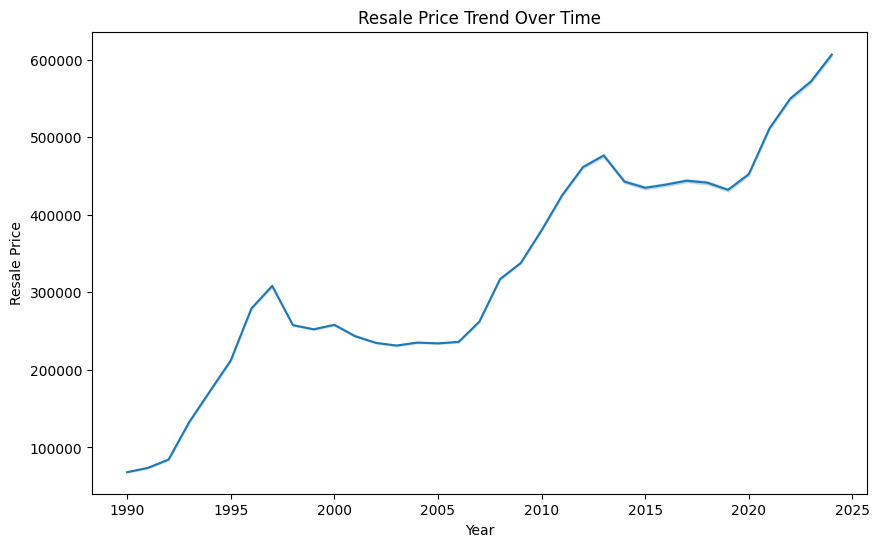

In [34]:
df.loc[:, 'lease_commence_date'] = df['lease_commence_date']

plt.figure(figsize=(10, 6))
sns.lineplot(x='reg_year', y='resale_price', data=df)
plt.title('Resale Price Trend Over Time')
plt.xlabel('Year')
plt.ylabel('Resale Price')
plt.show()

To Convert 'street_name','flat_model' ,'flat_type' ,'town' to numeric by Lable Encoder

In [37]:
label_encoder = LabelEncoder()
df.loc[:, 'street_name'] = label_encoder.fit_transform(df['street_name']).astype('int32')

In [38]:
label_encoder = LabelEncoder()
df.loc[:, 'flat_type'] = label_encoder.fit_transform(df['flat_type'])

In [39]:
label_encoder = LabelEncoder()
df.loc[:, 'flat_model'] = label_encoder.fit_transform(df['flat_model'])

In [40]:
label_encoder = LabelEncoder()
df.loc[:, 'town'] = label_encoder.fit_transform(df['town'])

In [41]:
label_encoder = LabelEncoder()
df.loc[:, 'storey_range'] = label_encoder.fit_transform(df['storey_range'])

In [42]:
df.drop(columns='month', inplace=True)

In [43]:
df.head()

,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,reg_year,reg_month
0,0,0,309,13,5,31.0,6,1977,9000.0,0,1990,1
1,0,0,309,13,2,31.0,6,1977,6000.0,0,1990,1
2,0,0,309,13,5,31.0,6,1977,8000.0,0,1990,1
3,0,0,309,13,4,31.0,6,1977,6000.0,0,1990,1
4,0,2,216,13,2,73.0,13,1976,47200.0,0,1990,1


In [44]:
df.drop("remaining_lease",inplace = True , axis = 1)

In [45]:
df['street_name'].unique()

array([13, 16, 17, 14, 18, 20, 19, 21, 15, 45, 42, 50, 342, 39, 47, 117,
       116, 38, 49, 48, 41, 43, 36, 37, 35, 40, 118, 440, 428, 71, 87, 85,
       72, 69, 68, 202, 66, 76, 67, 451, 490, 52, 491, 168, 493, 238, 201,
       230, 91, 200, 93, 492, 180, 294, 387, 228, 199, 243, 250, 237, 296,
       337, 495, 301, 300, 177, 384, 183, 244, 347, 427, 399, 508, 513,
       382, 98, 395, 394, 30, 441, 512, 487, 489, 145, 515, 144, 147, 146,
       143, 516, 153, 154, 151, 100, 148, 152, 141, 324, 248, 194, 178,
       437, 5, 191, 165, 368, 198, 31, 240, 193, 179, 210, 212, 207, 220,
       208, 320, 218, 214, 219, 486, 257, 262, 258, 259, 260, 261, 349,
       582, 203, 229, 62, 61, 63, 273, 270, 263, 271, 235, 444, 344, 188,
       33, 517, 507, 51, 520, 322, 287, 190, 169, 348, 293, 234, 340, 504,
       249, 292, 2, 302, 164, 326, 327, 329, 101, 103, 484, 102, 172, 325,
       196, 171, 445, 336, 205, 204, 206, 170, 400, 321, 423, 418, 420,
       421, 461, 463, 483, 478, 453, 464,

<Axes: title={'center': 'Correlation Matrix'}>

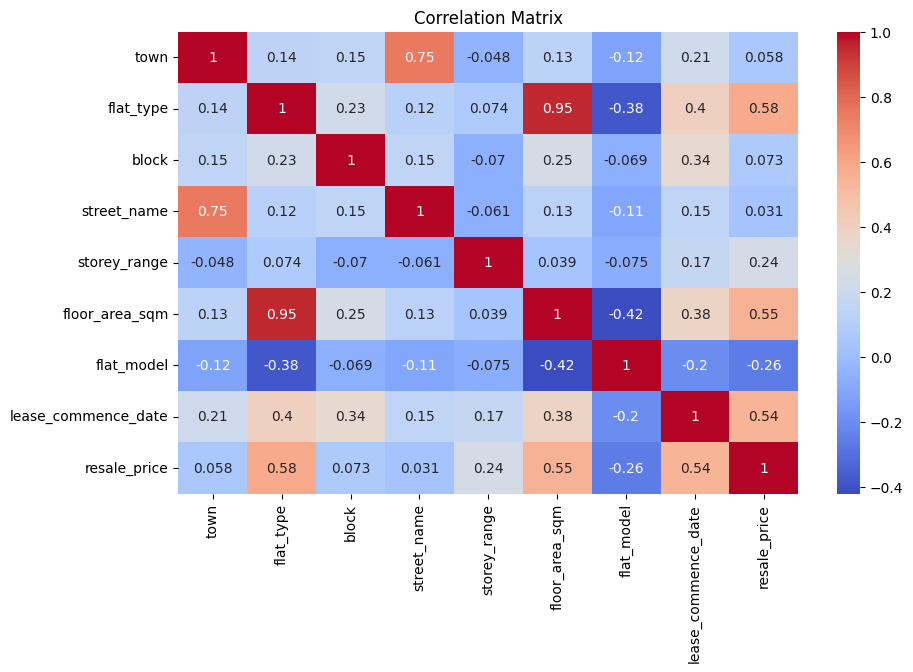

In [46]:
feature_cols = ['town', 'flat_type', 'block', 'street_name', 'storey_range','floor_area_sqm', 'flat_model', 'lease_commence_date',
                 'resale_price']
plt.figure(figsize = (10,6))
plt.title('Correlation Matrix')
sns.heatmap(df[feature_cols].corr(),cmap="coolwarm", annot = True)

In [47]:
# Split the data into features and target
x = df[['town','flat_type','block','street_name','storey_range','storey_range','flat_model','lease_commence_date','reg_year','reg_month']]
y = df['resale_price']

Split the data into train and test

In [48]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [49]:
x_train

,town,flat_type,block,street_name,storey_range,storey_range,flat_model,lease_commence_date,reg_year,reg_month
38777,26,5,324,564,4,4,3,1988,2018,10
259686,21,4,296,156,2,2,6,2002,2008,4
42479,4,2,16,387,2,2,18,1983,1993,3
97555,8,3,816,290,7,7,9,2017,2021,5
312014,26,2,242,566,4,4,13,1986,2010,1
...,...,...,...,...,...,...,...,...,...,...
259178,11,2,328,212,5,5,13,1983,1999,6
78642,25,4,214,332,13,13,6,1981,2002,2
131932,1,2,537,42,2,2,13,1980,1996,8
14308,20,3,507,514,0,0,9,2001,2015,10


Linear Regression model

In [50]:
linear_regression = LinearRegression()
linear_regression.fit(x_train , y_train)
y_pred = linear_regression.predict(x_test)

In [51]:
print(f'MAE = {metrics.mean_absolute_error(y_test,y_pred)}')
print(f'MSE = {metrics.mean_squared_error(y_test,y_pred)}')
print(f'RMSE  = {np.sqrt(metrics.mean_squared_error(y_test,y_pred))}')
print(f'R2 Score = {linear_regression.score(x_test,y_test)}')

MAE = 62355.5953519519
MSE = 7027830218.030244
RMSE  = 83832.15503630003
R2 Score = 0.7663833480014406


Decision Trees Regression

In [52]:
decision_tree_regressor = DecisionTreeRegressor()
decision_tree_regressor.fit(x_train, y_train)
y_pred = decision_tree_regressor.predict(x_test)

In [53]:
print(f'MAE is - {metrics.mean_absolute_error(y_test, y_pred)}')
print(f'MAE is - {metrics.mean_squared_error(y_test, y_pred)}')
print(f'RMSE is - {np.sqrt(metrics.mean_squared_error(y_test, y_pred))}')
print(f'R2 Score is - {decision_tree_regressor.score(x_test, y_test)}')

MAE is - 20536.220892808244
MAE is - 956183798.8572109
RMSE is - 30922.22176456942
R2 Score is - 0.9682148755940074


 Random Forest Regression

In [54]:
random_forest_regressor = RandomForestRegressor()
random_forest_regressor.fit(x_train, y_train)
y_pred = random_forest_regressor.predict(x_test)

In [55]:
print(f'MAE is - {mean_absolute_error(y_test, y_pred)}')
print(f'MSE is - {mean_squared_error(y_test, y_pred)}')
print(f'RMSE is - {np.sqrt(mean_squared_error(y_test, y_pred))}')
print(f'R2 Score is - {random_forest_regressor.score(x_test, y_test)}')

MAE is - 15501.401540681263
MSE is - 523515378.8580536
RMSE is - 22880.45844947285
R2 Score is - 0.9825974865236777


In [56]:
 #Dession tree model is less error value,Easy to interpret and handles non-linear relationships
 #training time is less

Saving the Dession Tree Model 

In [57]:
with open ('dt.pkl', 'wb') as f:
    pickle.dump(decision_tree_regressor , f)

Ordinal Encoding

In [58]:
categorical_columns = ['town', 'flat_type', 'block', 'street_name', 'flat_model']

In [59]:
# Create a dictionary to store unique values before and after encoding
unique_values_dict = {}

In [60]:
for column in categorical_columns:
    # Store unique values before encoding
    unique_values_dict[f'{column}_before'] = df[column].unique().tolist()

In [61]:
# Perform ordinal encoding
le = LabelEncoder()
df[column] = le.fit_transform(df[[column]])

c:\Users\Aravind Chirshtopher\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [62]:
# Store unique values after encoding
unique_values_dict[f'{column}_after'] = df[column].unique().tolist()

In [63]:
# Now unique_values_dict contains unique values before and after ordinal encoding
unique_values_dict

{'town_before': [0,
  1,
  2,
  3,
  4,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  16,
  19,
  21,
  22,
  23,
  24,
  25,
  26,
  15,
  20,
  5,
  17,
  18],
 'flat_type_before': [0, 2, 3, 4, 1, 5, 6],
 'block_before': ['309',
  '216',
  '211',
  '202',
  '235',
  '232',
  '308',
  '220',
  '219',
  '247',
  '320',
  '252',
  '223',
  '230',
  '329',
  '313',
  '117',
  '110',
  '343',
  '345',
  '346',
  '121',
  '129',
  '130',
  '128',
  '127',
  '126',
  '403',
  '404',
  '405',
  '417',
  '418',
  '419',
  '441',
  '442',
  '443',
  '444',
  '450',
  '435',
  '433',
  '434',
  '424',
  '425',
  '466',
  '471',
  '474',
  '570',
  '586',
  '455',
  '465',
  '463',
  '564',
  '560',
  '558',
  '559',
  '538',
  '534',
  '601',
  '603',
  '604',
  '608',
  '611',
  '505',
  '503',
  '610',
  '607',
  '524',
  '513',
  '643',
  '542',
  '548',
  '550',
  '639',
  '637',
  '330',
  '333',
  '156',
  '152',
  '178',
  '180',
  '209',
  '231',
  '254',
  '103',
  '105',
  '344'

In [64]:
# Convert the unique_value dictionary to a JSON file with proper indentation
with open('Category_Columns_Encoded_Data.json', 'w') as file:
    json.dump(unique_values_dict, file , indent = 4)